In [1]:
#导入工具包
from tools.preprocess import preprocess, distance, delete_file
from tools.data_loader import data_loader
from tools.results_process import results_process
from tools.predict import predict
#使用sklearn
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering

In [2]:
#数据预处理
df = preprocess("lng2.csv", "lng2_stop_spots.csv")
print(df)

             long       lati  behavior
0      -93.690946  29.430205         0
1      -93.869553  29.742933         0
2      -77.112352  17.828826         0
3      -93.701596  29.405870         0
4      -77.113817  17.828412         0
...           ...        ...       ...
13820  111.002755   4.138591         0
13821  110.735278   3.881309         0
13822  112.976572   3.354559         0
13823  113.059440   3.264034         1
13824  103.649582   1.217547         0

[13825 rows x 3 columns]


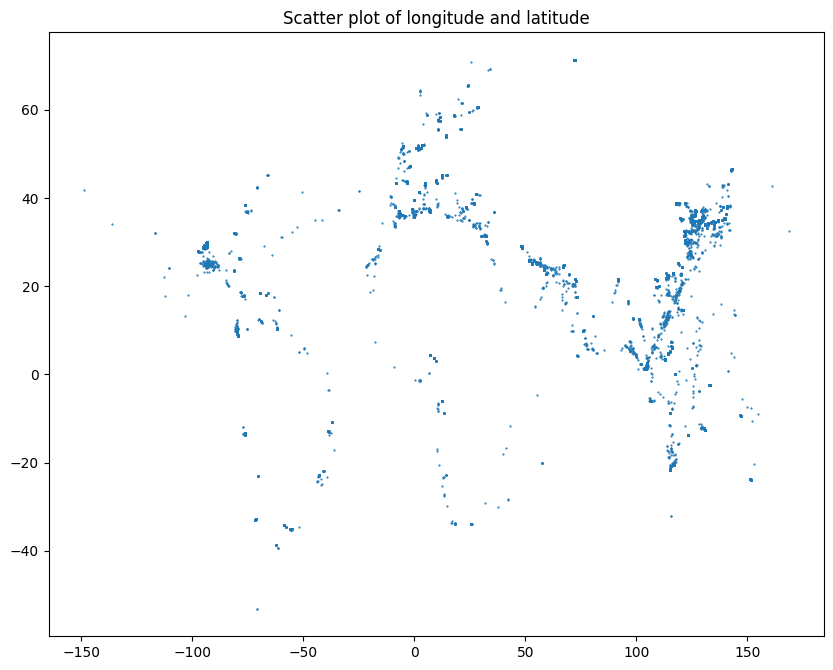

In [2]:
#数据加载
loader = data_loader("lng2_stop_spots.csv")
data, coord = loader.load()
loader.show_scatter()

K-means
总数:  13825
聚类中心点数:  400

其中，
	LNG入口点有:  116 个
	LNG出口点有:  88 个
	停泊点有:  196 个


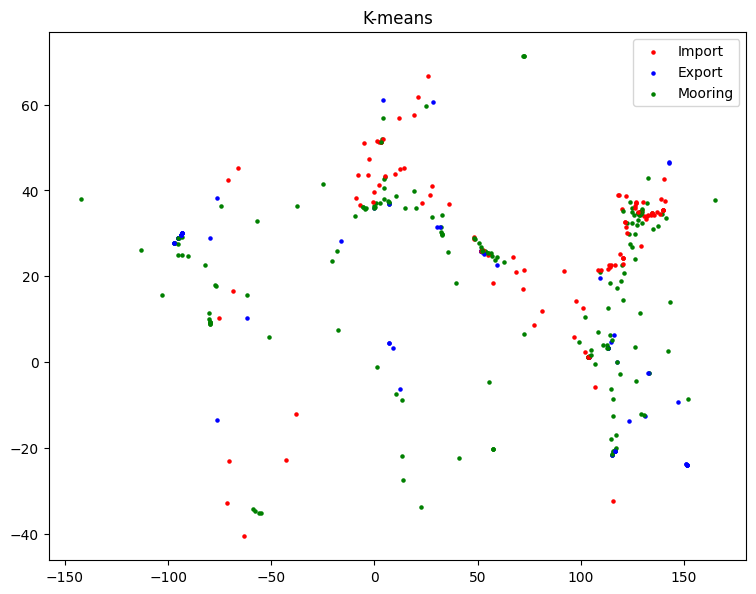

In [4]:
#使用K-means算法聚合数据
clustering_kmeans = KMeans(n_clusters=400, init='random').fit(coord)
dic = results_process(clustering_kmeans, data, "K-means", filename="lng_results_list(K-means).json")

print("K-means")
print("总数: ", len(clustering_kmeans.labels_))
print("聚类中心点数: ", len(clustering_kmeans.cluster_centers_))
print()
print("其中，")
print("\tLNG入口点有: ", len(dic["import"]), "个")
print("\tLNG出口点有: ", len(dic["export"]), "个")
print("\t停泊点有: ", len(dic["mooring"]), "个")

K-means++
总数:  13825
聚类中心点数:  600

其中，
	LNG入口点有:  119 个
	LNG出口点有:  44 个
	停泊点有:  437 个


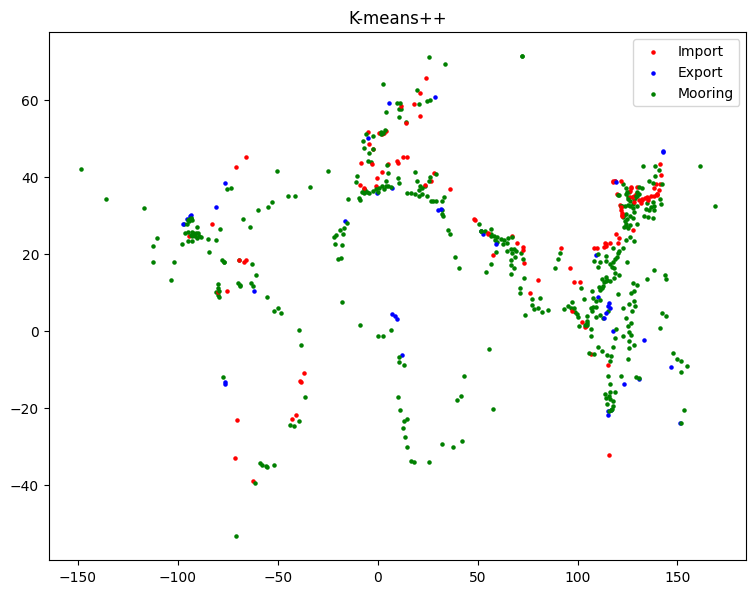

In [5]:
#使用K-means++算法聚合数据
clustering_kmeanspp = KMeans(n_clusters=600, init='k-means++').fit(coord)
dic = results_process(clustering_kmeanspp, data, "K-means++", filename="lng_results_list(K-means++).json")

print("K-means++")
print("总数: ", len(clustering_kmeanspp.labels_))
print("聚类中心点数: ", len(clustering_kmeanspp.cluster_centers_))
print()
print("其中，")
print("\tLNG入口点有: ", len(dic["import"]), "个")
print("\tLNG出口点有: ", len(dic["export"]), "个")
print("\t停泊点有: ", len(dic["mooring"]), "个")

DBSCAN
总数:  13825
聚类中心点数:  388

其中，
	LNG入口点有:  128 个
	LNG出口点有:  49 个
	停泊点有:  211 个


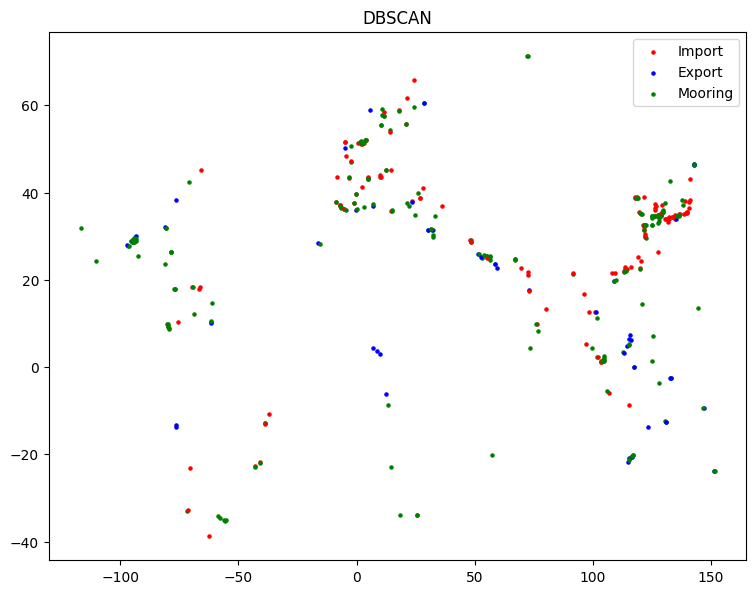

In [11]:
#使用DBSCAN算法聚合数据
clustering_dbscan = DBSCAN(eps=0.05, min_samples=3).fit(coord)
dic = results_process(clustering_dbscan, data, "DBSCAN", filename="lng_results_list(DBSCAN).json")

print("DBSCAN")
print("总数: ", len(clustering_dbscan.labels_))
print("聚类中心点数: ", len(set(clustering_dbscan.labels_)) - (1 if -1 in clustering_dbscan.labels_ else 0))
print()
print("其中，")
print("\tLNG入口点有: ", len(dic["import"]), "个")
print("\tLNG出口点有: ", len(dic["export"]), "个")
print("\t停泊点有: ", len(dic["mooring"]), "个")

OPTICS
总数:  13825
聚类中心点数:  318

其中，
	LNG入口点有:  115 个
	LNG出口点有:  80 个
	停泊点有:  123 个


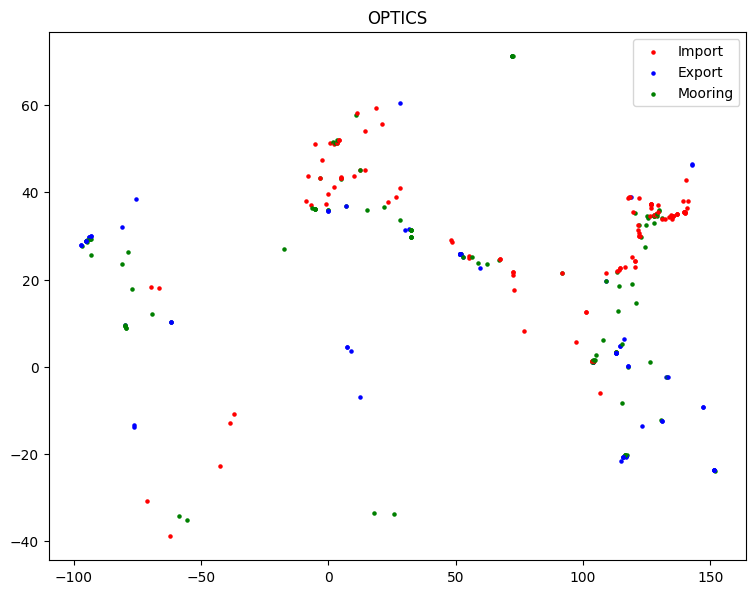

In [8]:
#使用OPTICS算法聚合数据
clustering_optics = OPTICS(min_samples=15).fit(coord)
dic = results_process(clustering_optics, data, "OPTICS", filename="lng_results_list(OPTICS).json")

print("OPTICS")
print("总数: ", len(clustering_optics.labels_))
print("聚类中心点数: ", len(set(clustering_optics.labels_)) - (1 if -1 in clustering_optics.labels_ else 0))
print()
print("其中，")
print("\tLNG入口点有: ", len(dic["import"]), "个")
print("\tLNG出口点有: ", len(dic["export"]), "个")
print("\t停泊点有: ", len(dic["mooring"]), "个")

AGNES
总数:  13825
聚类中心点数:  650

其中，
	LNG入口点有:  119 个
	LNG出口点有:  45 个
	停泊点有:  486 个


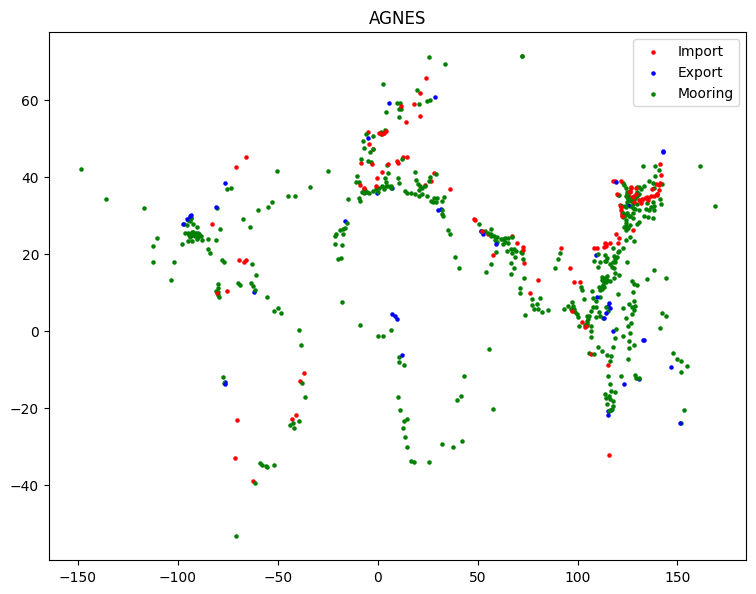

In [8]:
#使用AGNES算法聚合数据
clustering_agnes = AgglomerativeClustering(n_clusters=650).fit(coord)
dic = results_process(clustering_agnes, data, "AGNES", filename="lng_results_list(AGNES).json")

print("AGNES")
print("总数: ", len(clustering_agnes.labels_))
print("聚类中心点数: ", clustering_agnes.n_clusters_)
print()
print("其中，")
print("\tLNG入口点有: ", len(dic["import"]), "个")
print("\tLNG出口点有: ", len(dic["export"]), "个")
print("\t停泊点有: ", len(dic["mooring"]), "个")

In [9]:
#删除预处理文件
delete_file("lng2_stop_spots.csv")